In [1]:
#data for WASP-135 b observations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
plt.style.use('dark_background')

In [2]:
#O-C for AIJ Tc results
#data_date_obs = [Tc_exp, Tc_obs]
d_2020_04_23 = [2458962.8635, 2458962.863485893]
d_2020_05_07 = [2458976.8873, 2458976.869835546]
d_2020_05_27 = [2458997.8980, 2458997.887129746]
d_2020_06_11 = [2459011.9118, 2459011.903662297]
d_2021_03_28 = [2459301.9974, 2459301.989484424]
d_2021_05_12 = [2459346.8415, 2459346.830830686]
d_2021_06_02 = [2459367.8622, 2459367.850342210]
d_2021_07_14 = [2459409.9036, 2459409.904120878]
d_2021_07_26 = [2459422.5160, 2459422.513880192]
d_2021_08_14 = [2459440.7339, 2459440.730359323]
d_2021_08_21 = [2459447.7408, 2459447.741509456]
d_2021_09_04 = [2459461.7546, 2459461.755190148]

data_2020 = np.array([d_2020_04_23, d_2020_05_07, d_2020_05_27, d_2020_06_11])
data_2021 = np.array([d_2021_03_28, d_2021_05_12, d_2021_06_02, d_2021_07_14, d_2021_07_26, d_2021_08_14,
    d_2021_08_21, d_2021_09_04])
data_total = np.concatenate((data_2020, data_2021))

O-C for  [2458962.8635     2458962.86348589] =  -1.410720869898796e-05 (BJD_TDB)
O-C for  [2458976.8873     2458976.86983555] =  -0.017464454285800457 (BJD_TDB)
O-C for  [2458997.898      2458997.88712975] =  -0.010870254132896662 (BJD_TDB)
O-C for  [2459011.9118    2459011.9036623] =  -0.008137702941894531 (BJD_TDB)


Text(0.5, 0, 'Observed Tc (BJD_TDB)')

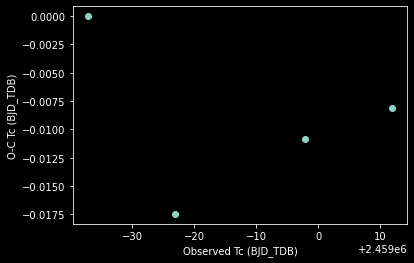

In [3]:
O_C_2020 = np.zeros(len(data_2020))
Tc_obs_2020 = np.zeros(len(data_2020))
for i in range(0, len(data_2020)):
    O_C_2020[i] = data_2020[i][1] - data_2020[i][0]
    Tc_obs_2020[i] = data_2020[i][1]
    print("O-C for ", data_2020[i], "= ",O_C_2020[i], "(BJD_TDB)")
plt.plot(Tc_obs_2020, O_C_2020,'o')
plt.ylabel('O-C Tc (BJD_TDB)')
plt.xlabel('Observed Tc (BJD_TDB)')

O-C for  [2459301.9974     2459301.98948442] =  -0.007915576454252005 (BJD_TDB)
O-C for  [2459346.8415     2459346.83083069] =  -0.010669314302504063 (BJD_TDB)
O-C for  [2459367.8622     2459367.85034221] =  -0.011857789941132069 (BJD_TDB)
O-C for  [2459409.9036     2459409.90412088] =  0.0005208780057728291 (BJD_TDB)
O-C for  [2459422.516      2459422.51388019] =  -0.002119807992130518 (BJD_TDB)
O-C for  [2459440.7339     2459440.73035932] =  -0.0035406770184636116 (BJD_TDB)
O-C for  [2459447.7408     2459447.74150946] =  0.0007094563916325569 (BJD_TDB)
O-C for  [2459461.7546     2459461.75519015] =  0.0005901479162275791 (BJD_TDB)


Text(0.5, 0, 'Observed Tc (BJD_TDB)')

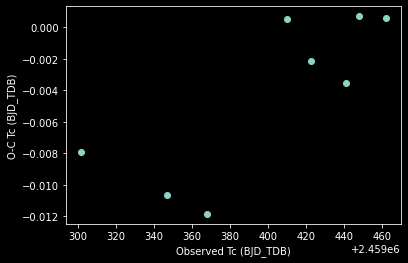

In [4]:
O_C_2021 = np.zeros(len(data_2021))
Tc_obs_2021 = np.zeros(len(data_2021))
for i in range(0, len(data_2021)):
    O_C_2021[i] = data_2021[i][1] - data_2021[i][0]
    Tc_obs_2021[i] = data_2021[i][1]
    print("O-C for ",data_2021[i], "= ",O_C_2021[i], "(BJD_TDB)")
plt.plot(Tc_obs_2021, O_C_2021,'o')
plt.ylabel('O-C Tc (BJD_TDB)')
plt.xlabel('Observed Tc (BJD_TDB)')

P = 1.4013910838645527 days
T0 = 2458962.855975056


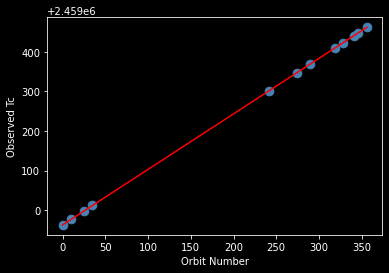

In [5]:
Tc_obs = np.array([
    2458962.863485893, 2458976.869835546, 2458997.887129746, 2459011.903662297,
    2459301.989484424, 2459346.830830686, 2459367.850342210, 2459409.904120878,
    2459422.513880192, 2459440.730359323, 2459447.741509456, 2459461.755190148
])
Tc_obs_0 = Tc_obs - Tc_obs[0]
#print(Tc_obs_0)
P = 1.4013788  #orbital period for WASP-135
orbit = np.rint(
    Tc_obs_0 /
    P)  #number of orbits since first observation (rounded to nearest integer)
#print(orbit)
m, b = np.polyfit(orbit, Tc_obs, 1)
X = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, m * X + b, c='r')
plt.scatter(orbit, Tc_obs, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
print("P =", m, "days")
print("T0 =", b)
#plt.savefig("WASP_135_AIJ_Period_Fit")